# Finance notebooks #
## Some basics: volatility ##

Some basic analysis about volatility in financial markets. As usual, with **python** (https://www.python.org/) and **pandas** (http://pandas.pydata.org/).

In [1]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt

# Defines the chart color scheme using Tableu's Tableau10 
plt.style.use('https://gist.githubusercontent.com/mbonix/8478091db6a2e6836341c2bb3f55b9fc/raw/7155235ed03e235c38b66c160d402192ad4d94d9/tableau10.mplstyle')

%matplotlib inline

We start by downloading some stock prices from Google Finance, namely the prices of **Apple** (AAPL), **Alphabet** (former Google, GOOGL), **Microsoft** (MSFT), **McDonald's** (MCD), **Coca-Cola** (KO) over a ten-year period.

In [2]:
# List of stocks tickers
STOCKS = ['NASDAQ:AAPL', 'NASDAQ:GOOGL', 'NASDAQ:MSFT', 'NYSE:MCD', 'NYSE:KO']

# Analysis period
START = '12-30-2006'
END = '12-31-2016'

data = web.DataReader(STOCKS, 'google', pd.to_datetime(START), pd.to_datetime(END))

# Only Close prices are relevant for analysis
prices = data.loc['Close', :, :]
prices.tail(10)

,NASDAQ:AAPL,NASDAQ:GOOGL,NASDAQ:MSFT,NYSE:KO,NYSE:MCD
Date,,,,,
2016-12-16,115.97,809.84,62.30,41.74,123.24
2016-12-19,116.64,812.50,63.62,41.67,122.99
2016-12-20,116.95,815.20,63.54,41.66,123.33
2016-12-21,117.06,812.20,63.54,41.57,123.18
2016-12-22,116.29,809.68,63.55,41.55,123.72
2016-12-23,116.52,807.80,63.24,41.60,123.14
2016-12-27,117.26,809.93,63.28,41.61,123.07
2016-12-28,116.76,804.57,62.99,41.39,122.68
2016-12-29,116.73,802.88,62.90,41.60,122.79


Let's plot prices to visually check them.

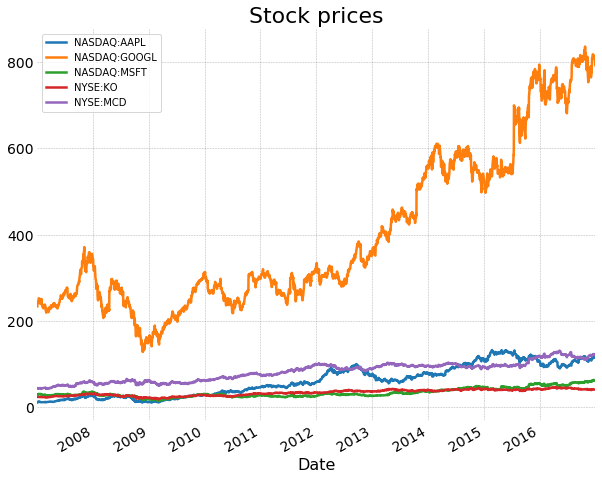

In [3]:
prices.plot(figsize=(10, 8), title='Stock prices');

Now, let's plot daily returns.

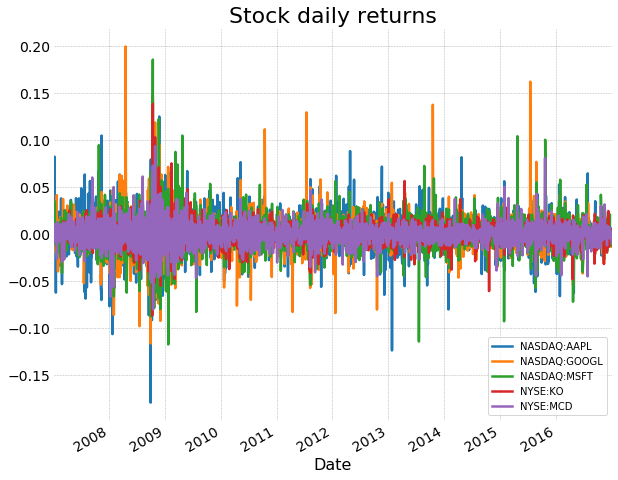

In [4]:
prices.pct_change().plot(figsize=(10, 8), title='Stock daily returns');

A bit confused, isn'it? Anyway, it's clear that daily returns span over different ranges over time and across stocks, with several positive and negative spikes. To measure that variability, **volatility**, or standard deviation of returns, is often used.

But **volatility** depends on calculation period and frequency. So, a long-term volatility, for instance computed on a 5 years period...

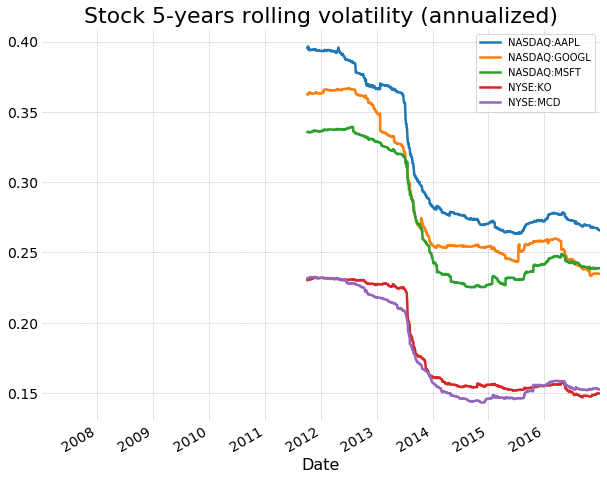

In [5]:
# We annualize the volatility multiplying it by (the root of) 260, which is a standard that approximates business days in a year
prices.fillna(method='pad').pct_change().rolling(1200).std().apply(lambda x: x * 260 ** 0.5).plot(figsize=(10, 8), title='Stock 5-years rolling volatility (annualized)');

...is very different from a short-term volatility (let's say, calculated on a 3 months period).

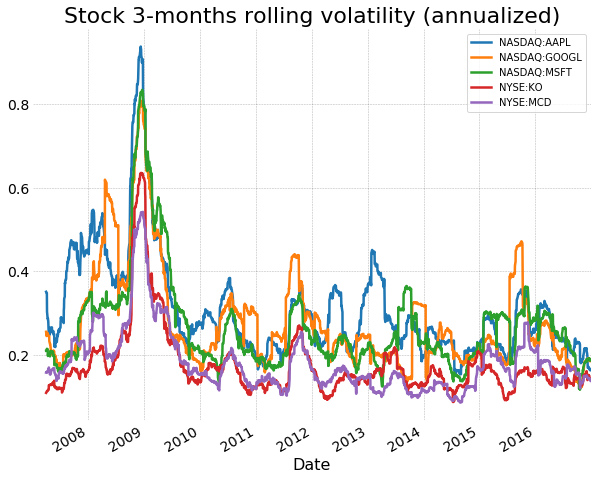

In [6]:
prices.fillna(method='pad').pct_change().rolling(60).std().apply(lambda x: x * 260 ** 0.5).plot(figsize=(10, 8), title='Stock 3-months rolling volatility (annualized)');

The former is smoother and spans over a smaller range, while the latter is more variable. And if we change the frequency of data, results are different again. Let's try it with monthly and weekly instead of daily returns!

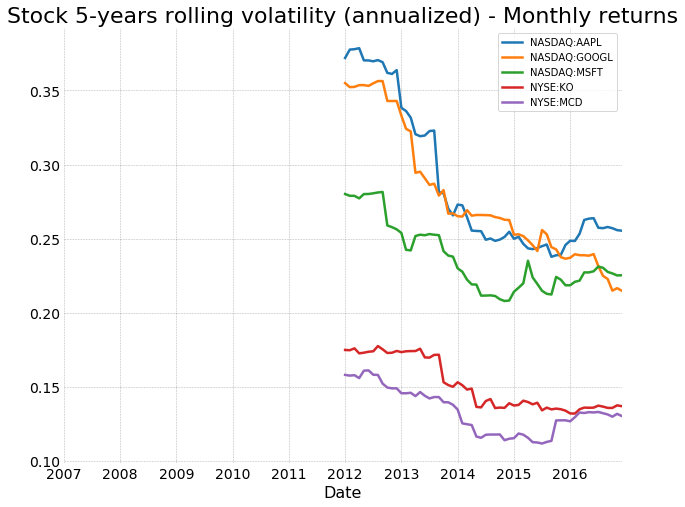

In [7]:
prices.fillna(method='pad').resample('M').last().pct_change().rolling(60).std().apply(lambda x: x * 12 ** 0.5).plot(figsize=(10, 8), title='Stock 5-years rolling volatility (annualized) - Monthly returns');

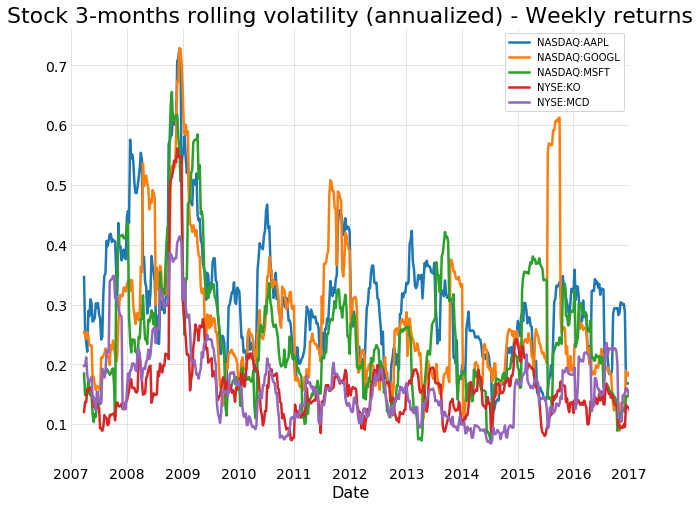

In [8]:
prices.fillna(method='pad').resample('W').last().pct_change().rolling(12).std().apply(lambda x: x * 52 ** 0.5).plot(figsize=(10, 8), title='Stock 3-months rolling volatility (annualized) - Weekly returns');

As you can see, patterns are similar, but actual values are different! Long term volatility is useful to assess the "average" variability of returns over time, while short term volatility can be used to measure sudden deviations from the mean.

Exponential weighted function is another method to compute volatility preserving sudden spikes of returns. Let's plot an exponential weighted volatility with a decay factor of 5%.

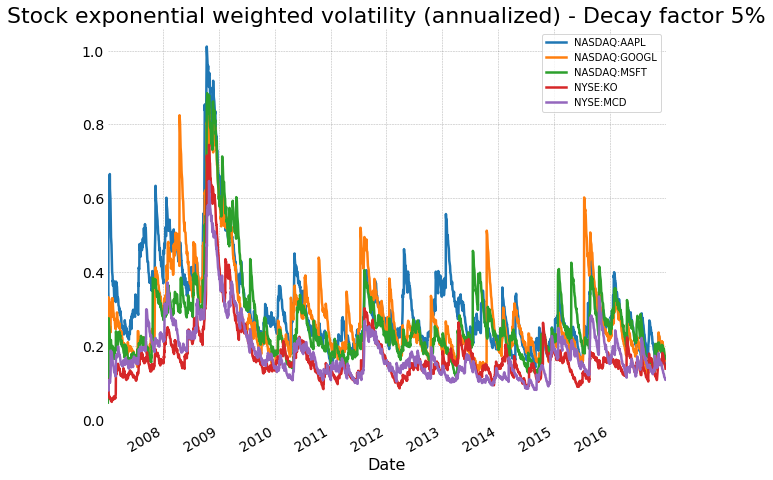

In [11]:
prices.fillna(method='pad').pct_change().ewm(alpha=0.05).std().apply(lambda x: x * 260 ** 0.5).plot(figsize=(10, 8), title='Stock exponential weighted volatility (annualized) - Decay factor 5%');

In this case, the pattern is similar to the short term volatility, but the "reaction" to spikes of returns is quicker and fades less slowly.

A measure of variability derived from volatility of returns is the **downside risk**, the volatility computed only on negative returns (or returns below a given threshold). Let's see how to calculate it - using exponential weighted method - and how to plot it with pandas.

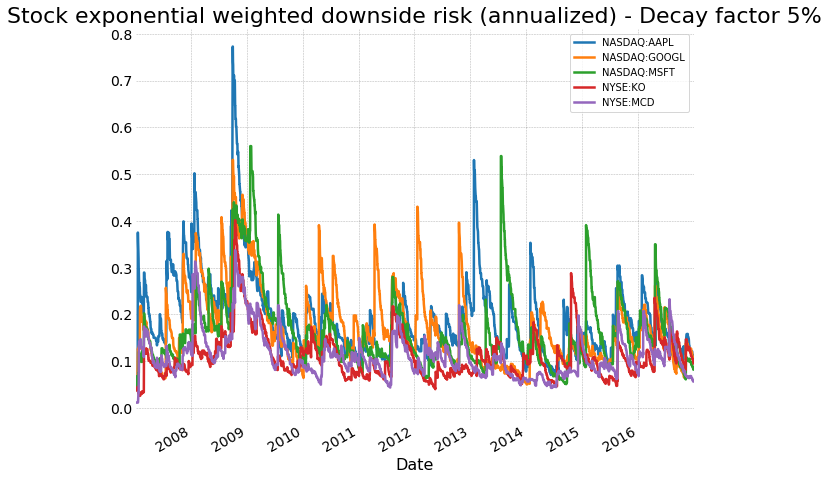

In [14]:
prices.fillna(method='pad').pct_change()[prices.fillna(method='pad').pct_change() < 0].ewm(alpha=0.05).std().apply(lambda x: x * 260 ** 0.5).plot(figsize=(10, 8), title='Stock exponential weighted downside risk (annualized) - Decay factor 5%');

So, we have reviewed some basics about volatility, the most common measure of market risk in finance.